# Neural Networks with keras and tensorflow

N.B. You will need to pip install keras and tensorflow!

In [1]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

For this lesson we'll use sklearn's built-in breast cancer dataset. The next cell loads the data and prints the data description.

In [2]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
# Splitting our data and initializing a Scaler

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

ss = StandardScaler()

In [5]:
# Transforming our data

X_tr_sc = ss.fit_transform(X_train)
X_te_sc = ss.transform(X_test)

In [6]:
X_tr_sc.shape

(426, 30)

## Constructing a Neural Network in Keras

In [7]:
# Importing model and layer types

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [51]:
# Constructing and compiling our model

model = Sequential()

inputs = X_train.shape[1]
model.add(Dense(inputs, input_dim=inputs, activation='relu'))
model.add(Dense(1))
adam = Adam()
model.compile(optimizer=adam, loss='mean_squared_error')

In [15]:
# Fitting our model

model.fit(X_tr_sc, y_train, validation_data=(X_te_sc, y_test),
          epochs=20)

Train on 426 samples, validate on 143 samples
Epoch 1/20
426/426 [==============================] - 0s 408us/step - loss: 0.4821 - val_loss: 0.3306
Epoch 2/20
426/426 [==============================] - 0s 66us/step - loss: 0.2628 - val_loss: 0.2229
Epoch 3/20
426/426 [==============================] - 0s 55us/step - loss: 0.1806 - val_loss: 0.1506
Epoch 4/20
426/426 [==============================] - 0s 58us/step - loss: 0.1344 - val_loss: 0.1236
Epoch 5/20
426/426 [==============================] - 0s 69us/step - loss: 0.1146 - val_loss: 0.1170
Epoch 6/20
426/426 [==============================] - 0s 75us/step - loss: 0.1025 - val_loss: 0.1115
Epoch 7/20
426/426 [==============================] - 0s 50us/step - loss: 0.0951 - val_loss: 0.1073
Epoch 8/20
426/426 [==============================] - 0s 61us/step - loss: 0.0888 - val_loss: 0.1050
Epoch 9/20
426/426 [==============================] - 0s 64us/step - loss: 0.0828 - val_loss: 0.0990
Epoch 10/20
426/426 [=======================

In [21]:
# Storing that fit as a history log

history_log = model.fit(X_tr_sc, y_train, validation_data=(X_te_sc, y_test),
                        epochs=50, verbose=0, batch_size=200)

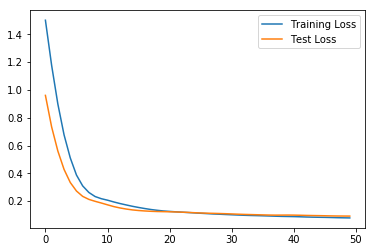

In [22]:
# Plotting our losses

train_loss = history_log.history['loss']
test_loss = history_log.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.legend();

In [29]:
history_log = model.fit(X_tr_sc, y_train, validation_data=(X_te_sc, y_test),
                        epochs=100, verbose=0, batch_size=200)

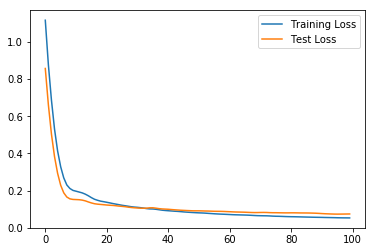

In [30]:
# Plotting our losses

train_loss = history_log.history['loss']
test_loss = history_log.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.legend();

## Tensorflow

In [37]:
import tensorflow as tf

In [32]:
# Non-dynamic programming!

var1 = 6
var2 = var1 * 3

In [33]:
var2

18

In [34]:
var1 = 8

In [35]:
var2

18

### Tensorflow as a graph constructor

In [39]:
# tf.placeholder()!

slot_1 = tf.placeholder(tf.int32, shape=(3, 2))
slot_2 = tf.placeholder(tf.int32, shape=(2, 3))

ans = tf.matmul(slot_1, slot_2)

In [43]:
# Starting a session

with tf.Session() as sess:
    result = sess.run(ans, feed_dict={slot_1: [[3, 3], [2, 2], [1, 1]],
                                      slot_2: [[1, 2, 3], [1, 1, 1]]})

In [44]:
# Printing the output

print(result)

[[ 6  9 12]
 [ 4  6  8]
 [ 2  3  4]]


### Neural Network

In [46]:
X_tr_sc.shape

(426, 30)

In [52]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 30))
y = tf.placeholder(dtype=tf.float32, shape=(None, 1))

hid = tf.layers.dense(X, 30, activation=tf.nn.relu)
y_hat = tf.layers.dense(hid, 1, activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)
optimizer = tf.train.AdamOptimizer(0.01)
training_run = optimizer.minimize(loss)

saver = tf.train.Saver()

In [53]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for _ in range(100):
        sess.run(training_run, feed_dict={X: X_tr_sc, y: y_train.reshape(-1, 1)})
        
    pred = sess.run(y_hat, feed_dict={X: X_te_sc})

classes = (pred > 0.5).astype(int)

metrics.mean_squared_error(y_test.reshape(-1, 1), classes)

0.013986013986013986